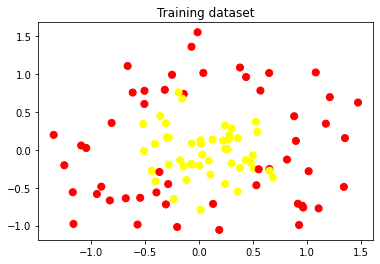

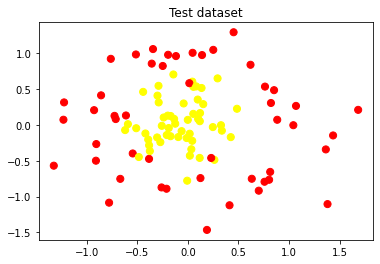

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np

X, y = make_circles(200, factor=0.2, noise=0.3, random_state=1)
x_train, x_test, y_train, y_test = train_test_split(X, y,
random_state=0, test_size=0.5)
plt.title('Training dataset')
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50,
cmap='autumn')
plt.show()
plt.title('Test dataset')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=50, cmap='autumn')
plt.show()


In [2]:
from sklearn.model_selection import cross_val_score

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
     # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
    levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])

     # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
            model.support_vectors_[:, 1],
            s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)






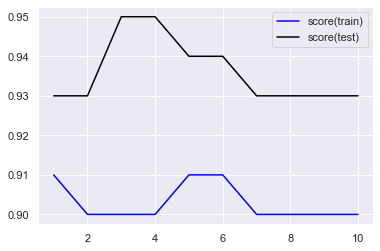

In [14]:
scores_list = []
scores_test_list = []

for c in range(1,11):
    clf = SVC(C = c,cache_size = 200,kernel ='rbf').fit(x_train,y_train)
    #scores = cross_val_score(clf,x_train,y_train)
    #scores_test = cross_val_score(clf,x_test,y_test)
    scores = clf.score(x_train,y_train)
    scores_test = clf.score(x_test,y_test)
    scores_list.append(np.mean(scores))
    scores_test_list.append(np.mean(scores_test))

x_grid = np.arange(1,11)
    
plt.plot(x_grid,scores_list, color = "blue",label = "score(train)")
plt.plot(x_grid,scores_test_list, color = "black", label = "score(test)" )
plt.legend(loc = "best")


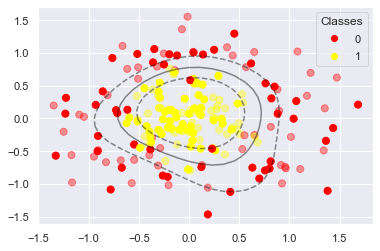

In [6]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=50,
cmap='autumn', alpha=0.4)
scatter_test = plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test,
s=50, cmap='autumn')
legend_test = plt.legend(*scatter_test.legend_elements(),
title="Classes")

clf = SVC(C = 4,cache_size = 200,kernel ='rbf').fit(x_train,y_train)
plot_svc_decision_function(clf)

predict = clf.predict(x_test)

accuracy score:0.95


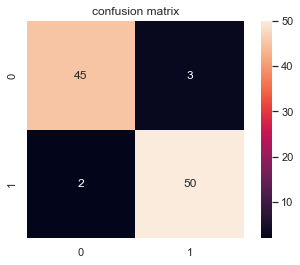

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

mat = confusion_matrix(predict,y_test)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = True)
plt.title('confusion matrix')
print("accuracy score:"+str(clf.score(x_test ,y_test)))